# Assignment 3 #
### Due: Monday, October 9th to be submitted via Canvas by 11:59 pm ###
### Total points: **90** ###

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names, UT EIDs and the homework group.**  

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

1. Homework Group - 68
2. Student Names:
                   Anmol Agrawal (aa96674)
                   Aishwarya Parida (ap63595)

## Q1. (30 points) - Comparing MLPs

In this problem, we will be comparing different MLP configurations on the California Housing dataset and the Diabetes dataset.

In [1]:
import numpy as np
from copy import deepcopy
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing, load_diabetes

In [2]:
seed = 42

In [3]:
# Load the Calinifornia Housing dataset and do train/val/test split
california_housing = fetch_california_housing()
housing_X, housing_y = california_housing['data'], california_housing['target']
housing_X_train, housing_X_tmp, housing_y_train, housing_y_tmp = train_test_split(housing_X, housing_y, test_size=0.4, random_state=seed)
housing_X_val, housing_X_test, housing_y_val, housing_y_test = train_test_split(housing_X_tmp, housing_y_tmp, test_size=0.5, random_state=seed)

housing_scaler = StandardScaler()
housing_X_train = housing_scaler.fit_transform(housing_X_train)
housing_X_val = housing_scaler.transform(housing_X_val)
housing_X_test = housing_scaler.transform(housing_X_test)
print(california_housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
# Load the Diabetes dataset and do train/val/test split
diabetes = load_diabetes()
diabetes_X, diabetes_y = diabetes['data'], diabetes['target']

diabetes_X_train, diabetes_X_tmp, diabetes_y_train, diabetes_y_tmp = train_test_split(diabetes_X, diabetes_y, test_size=0.4, random_state=seed)
diabetes_X_val, diabetes_X_test, diabetes_y_val, diabetes_y_test = train_test_split(diabetes_X_tmp, diabetes_y_tmp, test_size=0.5, random_state=seed)

diabetes_scaler = StandardScaler()
diabetes_X_train = diabetes_scaler.fit_transform(diabetes_X_train)
diabetes_X_val = diabetes_scaler.transform(diabetes_X_val)
diabetes_X_test = diabetes_scaler.transform(diabetes_X_test)
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

**Part 1** **(10 pts)**. Write the training and evaluation functions of the MLP. Use the default parameter values of sklearn.neural_network.MLPRegressor except:

*   **hidden_layer_size**: given by train_mlp parameter
*   **learning_rate_init**: given by a list of search space
*   **random_state**: given by train_mlp parameter
*   **max_iter**: fix at 300



In [41]:
def train_mlp(hidden_layer_size, X_train, y_train, X_val, y_val, seed):
    learning_rate_list = [1e-1, 1e-2, 1e-3, 1e-4]
    best_r2 = -np.inf # Determine the best model based on the R2 score on validation set # TO HIDE
    for lr in learning_rate_list:
        # Initialize MLPRegressor
        model=MLPRegressor(hidden_layer_sizes=hidden_layer_size,max_iter=300,learning_rate_init=lr,random_state=seed)

        # Fit the MLPRegressor to training data
        model.fit(X_train,y_train)

        # Predict and evaluate on train and validation data
        mse_train, r2_train = eval_model(model, X_train, y_train)
        mse_val, r2_val = eval_model(model, X_val, y_val)
        print(f"Learning rate: {lr} MSE train: {mse_train} R2 train: {r2_train} MSE val: {mse_val} R2 val: {r2_val}")

        # Record the best model according to R2 score on validation set
        if r2_val > best_r2:
            best_model = model
            best_lr=lr
            best_r2=r2_val

    return best_model, best_lr, best_r2

def eval_model(model, X, y):
    # Predict and evaluate
    y_pred=model.predict(X)
    mse=mean_squared_error(y,y_pred)
    r2=r2_score(y,y_pred)
    return mse, r2


**Part 2** **(5 pts)**.
Train two MLPs on the **housing dataset** with the following two different hidden layer size configurations and show their **MSE** and **R2 score** on the **test set**.
*   (8)
*   (64, 64)



In [42]:
### START CODE ###
housing_best_model,housing_best_lr,housing_best_r2=train_mlp((8),housing_X_train,housing_y_train,housing_X_val,housing_y_val,seed)

mse_test,r2_test=eval_model(housing_best_model,housing_X_test,housing_y_test)

### END CODE ###

print(f"Test MSE: {mse_test} Test R2: {r2_test}")

Learning rate: 0.1 MSE train: 0.35027525329748643 R2 train: 0.7359828150778966 MSE val: 0.3726774082651863 R2 val: 0.7144970949882286
Learning rate: 0.01 MSE train: 0.334521824008715 R2 train: 0.7478568370492932 MSE val: 0.35351651284456515 R2 val: 0.7291759866620738
Learning rate: 0.001 MSE train: 0.3343894234574139 R2 train: 0.7479566329112834 MSE val: 0.35499042645054313 R2 val: 0.7280468422414288
Learning rate: 0.0001 MSE train: 0.4331418308870668 R2 train: 0.673522791615294 MSE val: 0.4592155463352194 R2 val: 0.6482014482295081
Test MSE: 0.35000842201340565 Test R2: 0.7447291587040576


/Users/anmolagrawal/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [43]:
### START CODE ###
housing_best_model,housing_best_lr,housing_best_r2=train_mlp((64,64),housing_X_train,housing_y_train,housing_X_val,housing_y_val,seed)

mse_test,r2_test=eval_model(housing_best_model,housing_X_test,housing_y_test)

### END CODE ###

print(f"Test MSE: {mse_test} Test R2: {r2_test}")

Learning rate: 0.1 MSE train: 1.3327360826912436 R2 train: -0.004539217326371858 MSE val: 1.3100017112141167 R2 val: -0.003573830415521062
Learning rate: 0.01 MSE train: 0.1685481339978201 R2 train: 0.8729581851899063 MSE val: 0.30977096680274113 R2 val: 0.7626888323545603
Learning rate: 0.001 MSE train: 0.20584124261738085 R2 train: 0.8448488013209623 MSE val: 0.286803143601909 R2 val: 0.7802841576954735
Learning rate: 0.0001 MSE train: 0.26741512902207076 R2 train: 0.7984379744062986 MSE val: 0.31262030057434054 R2 val: 0.760505997948454
Test MSE: 0.2714596719780811 Test R2: 0.8020169387778011


/Users/anmolagrawal/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


**Part 3** **(5 pts)**. Train a **linear regression model** on the **housing dataset** and show their MSE and R2 scores on the test set. How do the performances of the two MLPs and the linear regression model compare, and what do you think causes the difference?

In [44]:
### START CODE ###

l=LinearRegression()

l.fit(housing_X_train,housing_y_train)

y_pred_lr=l.predict(housing_X_test)

mse_test=mean_squared_error(housing_y_test,y_pred_lr)

r2_test=r2_score(housing_y_test,y_pred_lr)

### END CODE ###
print(f"Test MSE: {mse_test} Test R2: {r2_test}")

Test MSE: 0.5546246533101034 Test R2: 0.5954968710766684


>We observed that MLP performed better compared to linear regression model as it have higher R2 and lower test MSE values.
This is because MLP can capture non-linear patterns in the data through their non-linear activation functions whereas linear regression assumes a linear relationship between variables, limiting its performance in complex scenarios.

**Part 4** **(5 pts)**. Now, train two MLPs on the **diabetes dataset** with the following two different hidden layer size configurations and show their **MSE** and **R2 score** on the **test set**.
*   (8)
*   (64, 64)

In [45]:
### START CODE ###
diabetes_best_model,diabetes_best_lr,diabetes_best_r2=train_mlp((8),diabetes_X_train,diabetes_y_train,diabetes_X_val,diabetes_y_val,seed)
mse_test,r2_test=eval_model(diabetes_best_model,diabetes_X_test,diabetes_y_test)
### END CODE ###
print(f"Test MSE: {mse_test} Test R2: {r2_test}")

Learning rate: 0.1 MSE train: 2476.3467595024326 R2 train: 0.585898539459291 MSE val: 2517.632414913162 R2 val: 0.5632838571464869
Learning rate: 0.01 MSE train: 2923.510957077445 R2 train: 0.5111225224872039 MSE val: 2897.769455293564 R2 val: 0.4973441349506216
Learning rate: 0.001 MSE train: 23187.857938274905 R2 train: -2.8775368603787332 MSE val: 21269.44841782192 R2 val: -2.689462932964871
Learning rate: 0.0001 MSE train: 28400.91006149956 R2 train: -3.7492776575100377 MSE val: 26368.757515117697 R2 val: -3.5740045312528217
Test MSE: 3031.3140854025273 Test R2: 0.4759604846674894


/Users/anmolagrawal/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anmolagrawal/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anmolagrawal/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [46]:
### START CODE ###
diabetes_best_model,diabetes_best_lr,diabetes_best_r2=train_mlp((64,64),diabetes_X_train,diabetes_y_train,diabetes_X_val,diabetes_y_val,seed)
mse_test,r2_test=eval_model(diabetes_best_model,diabetes_X_test,diabetes_y_test)
### END CODE ###
print(f"Test MSE: {mse_test} Test R2: {r2_test}")

Learning rate: 0.1 MSE train: 1206.4253098147976 R2 train: 0.7982582685924142 MSE val: 3723.543740013166 R2 val: 0.35410282682550287
Learning rate: 0.01 MSE train: 2243.706391797441 R2 train: 0.6248012963844647 MSE val: 2647.3837909669965 R2 val: 0.5407767905292498


/Users/anmolagrawal/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate: 0.001 MSE train: 2708.3640005183597 R2 train: 0.5470999834789378 MSE val: 2934.4456382474013 R2 val: 0.49098217318872484
Learning rate: 0.0001 MSE train: 25172.631134438427 R2 train: -3.2094360486565927 MSE val: 23365.034950969686 R2 val: -3.05296971908306
Test MSE: 3048.801456733654 Test R2: 0.47293734904425155


/Users/anmolagrawal/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


**Part 5** **(5 pts)**. Train another linear regression model on the **diabetes dataset** and show its **MSE** and **R2 score** on the **test set**. How do the performances of two MLPs and the linear regression model compare? Is the performance order on the diabetes dataset the same as the one on the housing dataset? If not, what causes the difference?

In [47]:
### START CODE ###
linear_model=LinearRegression()
linear_model.fit(diabetes_X_train,diabetes_y_train)
ypred_lr=linear_model.predict(diabetes_X_test)
mse_test=mean_squared_error(diabetes_y_test,ypred_lr)
r2_test=r2_score(diabetes_y_test,ypred_lr)
### END CODE ###
print(f"Test MSE: {mse_test} Test R2: {r2_test}")

Test MSE: 3245.611400975237 Test R2: 0.4389137589815668


>We observed that MLP performed slightly better compared to linear regression model as it have higher R2 and lower test MSE values.
This is because MLP can capture non-linear patterns in the data through their non-linear activation functions whereas linear regression assumes a linear relationship between variables, limiting its performance in complex scenarios.

## Q2. (20 points) Tensorflow Playground
In this question, you will be playing with [Tensorflow Playground](https://playground.tensorflow.org).


Select **Classification** as the Problem Type. Among the four datasets shown in DATA, please select the top left dataset.

Use the following settings as the DEFAULT settings for all subquestions:


*   Learning rate = 0.03
*   Activation = Tanh
*   Regularization = None
*   Ratio of training to test data = 50%
*   Noise = 0
*   Batch Size = 30
*   input as  𝑋1  with  𝑋2
*   One hidden layer with 4 neurons

a) **(4 pts)** Use the DEFAULT setting and run two experiments -

1.   Using Tanh as the activation function
2.   Using the Linear activation function.

Report the train, test losses for both at the end of 1000 epochs. What qualitative difference do you observe in the decision boundaries obtained? What do you think is the reason for this?

We will now study the effect of certain variations in the network structure or training process, keeping all other aspects the same as in the DEFAULT setting specified above, with Tanh as the activation.

b) **(4 pts)** Effect of number of hidden units: Keep other settings the same as in DEFAULT.


1.   Report the training loss and test loss at the end of 1000 epochs using 2 neurons and 8 neurons in the hidden layer.
2.   What do you observe in terms of the decision boundary obtained as the number of neurons increases? What do you think is the reason for this?

c) **(4 pts)** Effect of Learning rate and number of epochs: Keep other settings the same as in DEFAULT.

1.   For learning rate 10, 1, 0.1, 0.01 and 0.0001, report the train, test losses at the end of 100 epochs, 500 epochs and 1000 epochs respectively.
2.   What do you observe from the change of loss vs learning rate, and the change of loss vs epoch numbers? Also report your observations on the training and test loss curve (observe if you see noise for certain learning rates and reason why this is happening).



d) **(4 pts)** Effect of the number of layers:

1.   Change your activation to ReLU and use a single hidden layer with 4 neurons and then add another hidden layer with 3 neurons and train both your models for 1000 epochs.
2.   Comment on your final models and decision boundaries and observe your training and test loss curves as well.


e) **(4 pts)** Use the DEFAULT setting. Play around with any hyperparameters, network architectures or input features (such as  sin(𝑋1),𝑋21  etc.), and report the best train and test loss you obtain (test loss should be no greater than 0.06). Attach the screenshot showing your full network, output and the parameters. Briefly justify your results, and comment on what helps/what doesn't help with lowering the loss, etc.

## Answers 
**a) (4 pts) Use the DEFAULT setting and run two experiments -**

**Using Tanh as the activation function
Using the Linear activation function.
Report the train, test losses for both at the end of 1000 epochs. What qualitative difference do you observe in the decision boundaries obtained? What do you think is the reason for this?**

**We will now study the effect of certain variations in the network structure or training process, keeping all other aspects the same as in the DEFAULT setting specified above, with Tanh as the activation.**

    1. Using Tanh as the activation function
         Test loss 0.019
         Training loss 0.010
     
    2. Using the Linear activation function.
         Test loss 0.508
         Training loss 0.498
   
Tanh performs better than Linear activation function with lower loss value.In terms of decision boundaries we observe that tanh has performs better at classification than linear activation function as it has more clearly distinguished decision boundaries.

The reason for this behavior is due to the non-linear nature of the tanh activation function which results in better learning and adapting to the dataset compared to a linear activation function.  

**b)(4 pts) Effect of number of hidden units: Keep other settings the same as in DEFAULT.**

**Report the training loss and test loss at the end of 1000 epochs using 2 neurons and 8 neurons in the hidden layer.
What do you observe in terms of the decision boundary obtained as the number of neurons increases? What do you think is the reason for this?**

    1. Output with 2 neurons
        Test loss 0.263      
        Training loss 0.228

    2. Output with 8 neurons   
        Test loss 0.011        
        Training loss 0.006

The training and test loss observed in the model with 8 neurons is significantly smaller than the model with 2 neurons. We also observed distinguished circular boundries for the model with 8 neurons and no clearly distinguished circular boundries for the model with 2 neurons. 

Adding more neurons increases the model's capacity to learn complex patterns in the data. 

A network with too few neurons may also underfit the data. Increasing the number of neurons can reduce underfitting and improve the model's ability to generalize.

**c) (4 pts) Effect of Learning rate and number of epochs: Keep other settings the same as in DEFAULT.**

**For learning rate 10, 1, 0.1, 0.01 and 0.0001, report the train, test losses at the end of 100 epochs, 500 epochs and 1000 epochs respectively.**
**What do you observe from the change of loss vs learning rate, and the change of loss vs epoch numbers? Also report your observations on the training and test loss curve (observe if you see noise for certain learning rates and reason why this is happening).**

For Learning rate equals 10 the loss is pretty high because weights do not reach the optimal value due to high oscillations. On decreasing the learning rate we observe the loss to decrease rapidly till 0.1. at learning rate equals 0.01 and below we observe the loss to again increase because the weights do not converge due to smaller leaning rate even after high epoch value.

For a given learning rate we observe that the loss for epochs equals 1000 is less than epoch equals 500 and also lesser than epochs equals to 100. Increase in number of epochs leads to decrease in the loss. This is due to the fact that increase in the number of epochs results in increase in model complexity which enables better learning.

We observe that for neural nets with larger learning rates like 10 and 1, the training and test losses are high indicating noise in the curve. This is due to unstable oscillations in the values of the weights caused by taking larger steps in the gradient descent.

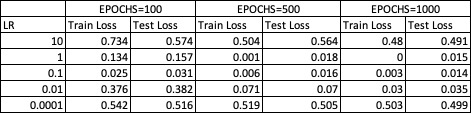

**d) (4 pts) Effect of the number of layers:**

**Change your activation to ReLU and use a single hidden layer with 4 neurons and then add another hidden layer with 3 neurons and train both your models for 1000 epochs.**
**Comment on your final models and decision boundaries and observe your training and test loss curves as well.**

Results with 1 hidden layer (4 neurons):

Training loss = 0.002

Test loss = 0.005

We observe a hexagonal decision boundary being formed at around 192-200 epochs.

Results with 2 hidden layers (4 neurons, 3 neurons):

Training loss = 0.000

Test loss = 0.002


With additional hidden layer, we observe a much faster convergence with an irregular hexagonal decision boundary at around 100 epochs.

For a neural network with two hidden layers, we observe smaller test and training losses as compared to sigle hidden layer model. This is due to increase in complexity of the model resulting in better learning and capturing more complex patterns.

Adding additional hidden layers can help in capturing complexity, but it can also result in overfitting the training data and give higher test losses in cases where the model is more complex as in the case with 2 hidden layers.



**e) (4 pts)Use the DEFAULT setting. Play around with any hyperparameters, network architectures or input features (such as  sin(𝑋1),𝑋21  etc.), and report the best train and test loss you obtain (test loss should be no greater than 0.06). Attach the screenshot showing your full network, output and the parameters. Briefly justify your results, and comment on what helps/what doesn't help with lowering the loss, etc.**

For this problem, we used a learning rate of 0.1 as it is not too high or too low.
We obtained a best train and test loss equal to 0.0 for inputs as X1^2 and X2^2 with 1 hidden layer with 4 neurons for both activation functions Relu as well as Tanh, but with Tanh we obtained a more circular boundary at smaller epochs (129) compared to Relu at (251 ephocs).

We also observed that for linear inputs, the loss did not reduce to 0 even after 1000 epochs for both Relu and Tanh.

We also observed that 𝑠𝑖𝑛(𝑋1) and 𝑠𝑖𝑛(𝑋2) as inputs are of almost no use in reducing error as even after increasing the number of neurons & layers and even after using 2000+ epochs, the losses remain high.


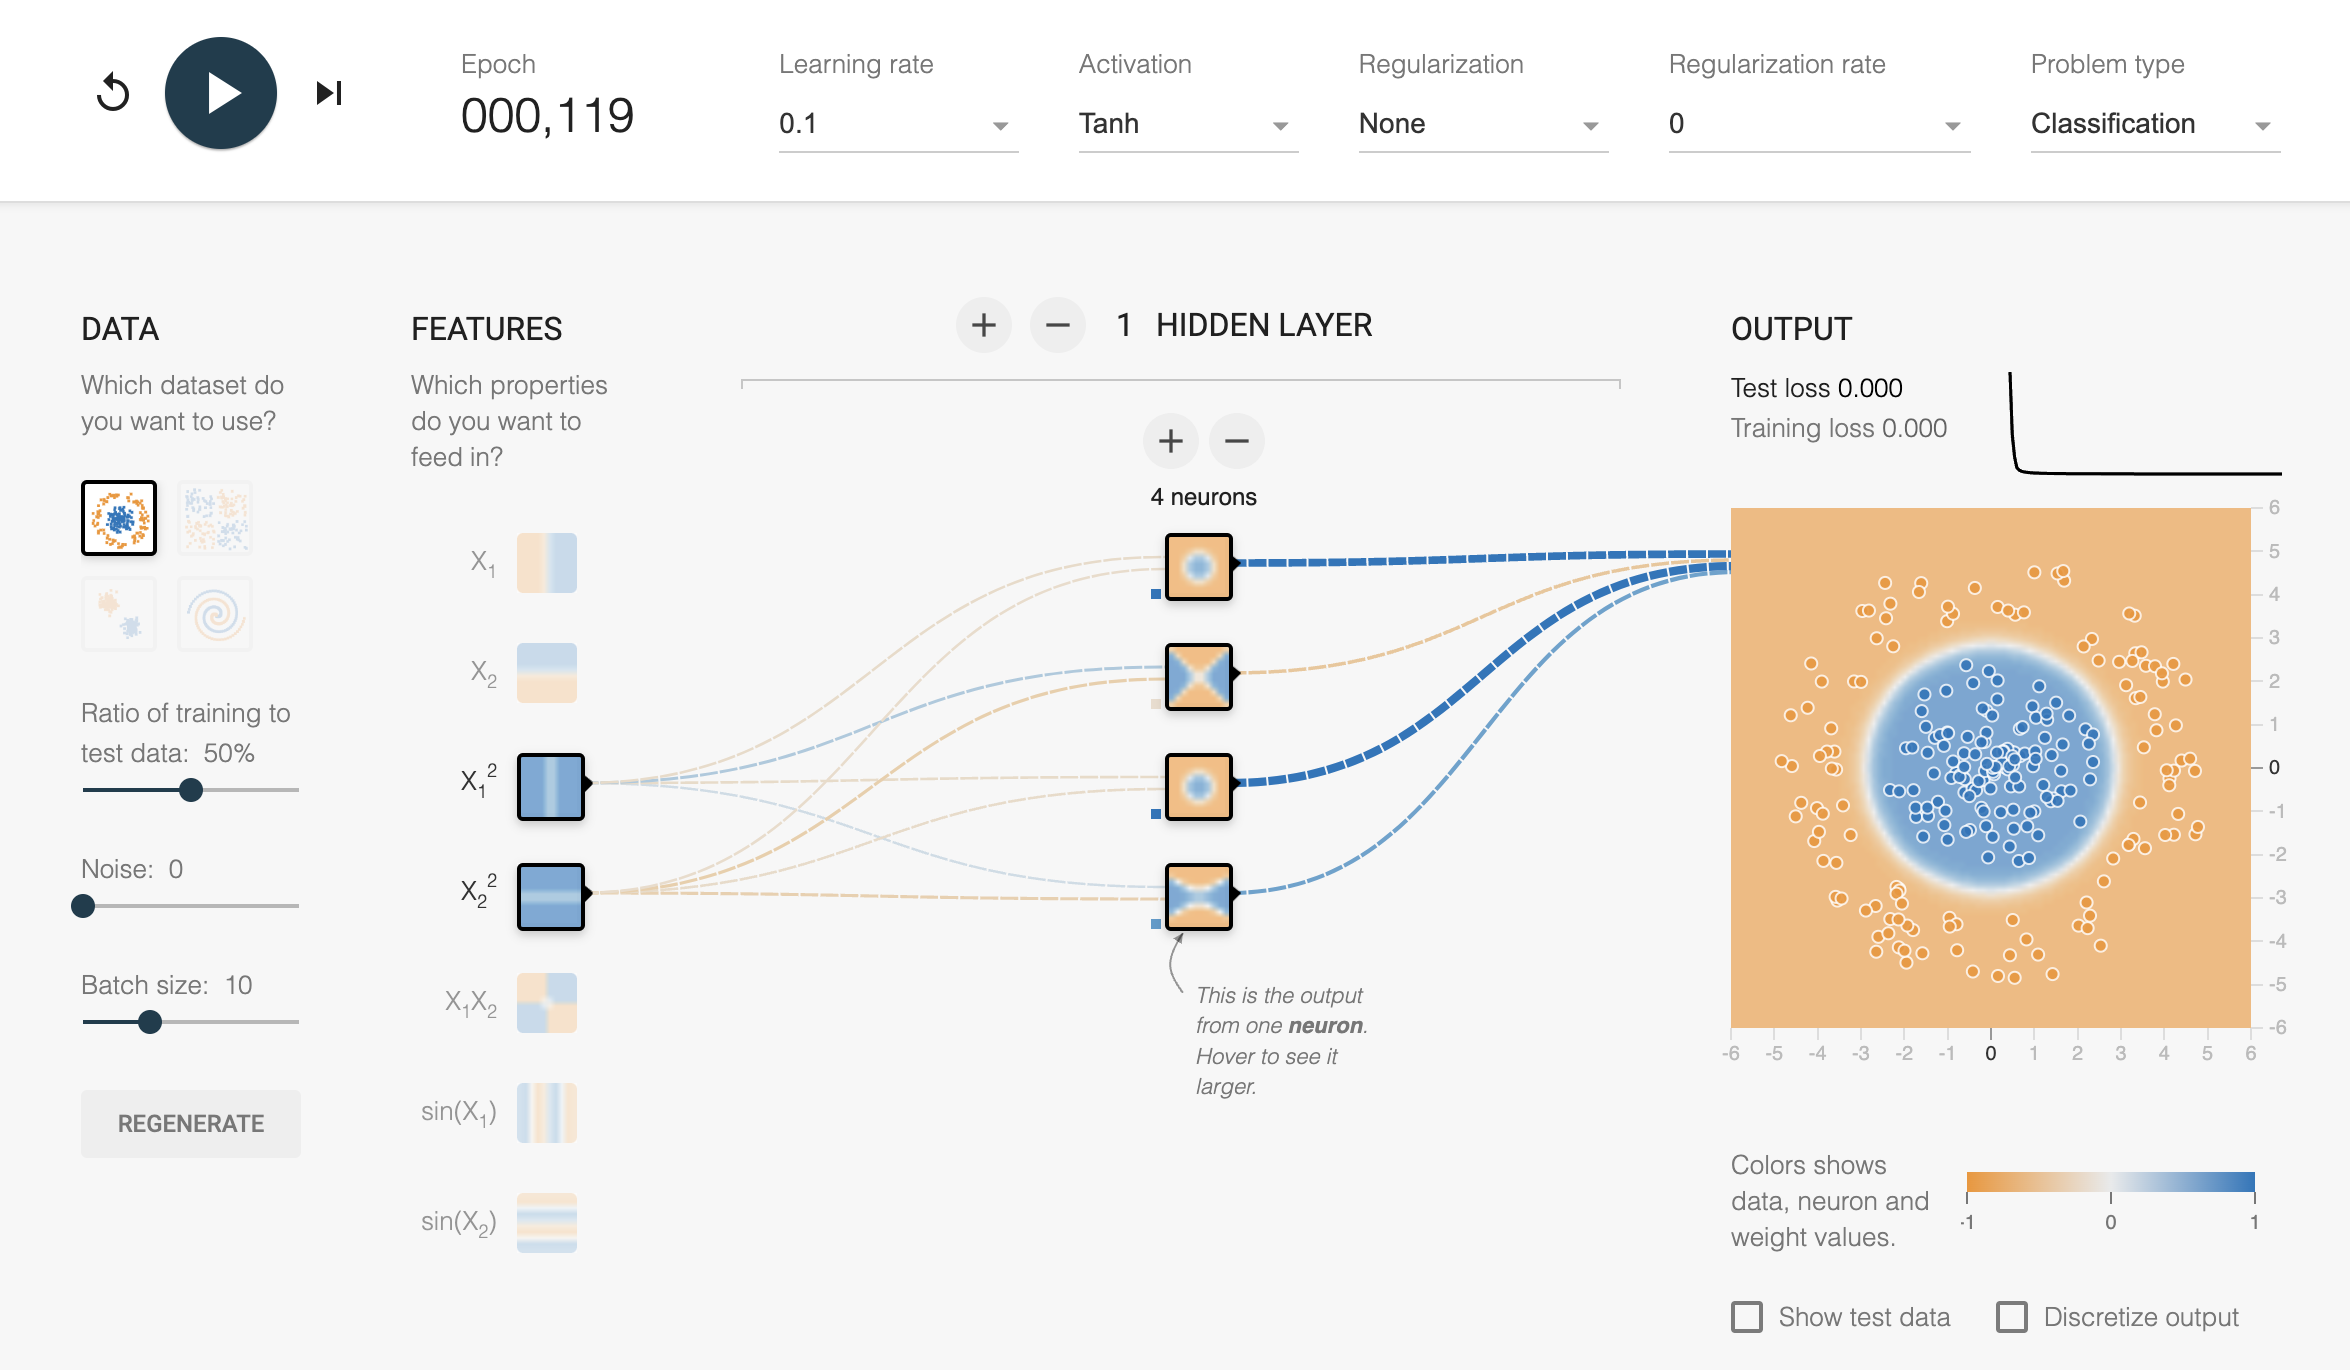

# Q3. (10 points) - Principal Component Analysis

**Part 1.** (5 points) Briefly explain the main principle behind the Principal Component Analysis algorithm. In what sense is the selection of the eigenvectors to represent the data an optimal choice.  How do you reconstruct (a noisy version of) the original data from the eigenvectors and the scores?

#### Ans
Principal component analysis is a dimensionality reduction method that is used to reduce the dimensionality of large data sets, by transforming a large set of features into a smaller one while ensuring that most of the variance of the dataset is preserved.

Principal components are constructed in such a manner that the first principal component accounts for the largest possible variance in the data set. The second principal component is then calculated such that it is uncorrelated with the first principal component and it accounts for the next highest variance and so on.
Eigenvectors are computed from the covariance matrix in order to determine the principal components of the data. They are actually the directions of the axes where there is the most variance and that is the direction in which Principal Components are constructed.
Hence, appropriate selection of the eigenvectors guide the direction in which we should construct the pricncipal componenst such that most of the variance of the dataset is preserved.

To reconstruct the original data from the principal components we multiply the inverse of the eigenvector matrix by the principal component values.If there is missing or noisy information in the values of the principal components, this will result in a noisy version of the original data after reconstruction. 

**Part 2**. (5 points) Read this [article](https://erdem.pl/2020/04/t-sne-clearly-explained) on t-SNE, a dimensionality reduction technique for visualization and explain it in your own words in one or two paragraphs.

#### Ans
t-SNE is a non-linear unsupervised dimensionality reduction technique. This algorithm allows us to separate data that is lineraly non separable.
The first step in t-SNE is to create a probability distribution that represents similarities between neighbors.
t-SNE calculates pairwise similarities between data points in the N-dimensional space. It uses a Gaussian distribution to measure the similarity between points.

t-SNE converts the similarities into conditional probabilities. For each data point, it calculates the probability of another point being its neighbor based on the similarities. The standard deviation of the Gaussian distribution used in this step is determined by a parameter- Perplexity which denotes the number of effective neighbors for each point.
After calculating the conditional probabilities for all data points,t-SNE constructs joint probability distributions

Next in t-SNE, we create a low-dimensional space with the same number of points as the original space, randomly distributing these points. Instead of using Gaussian distribution, which causes crowding, we use Student t-distribution with a single degree of freedom for a better representation because it has a very long tail and falls quickly.

A gradient is calculated for each point and which describes how strongly it should be pulled and the direction it should choose. The point moves in the direction with the strongest pull.
As the points move one step at a time in a specified direction, we ultimately obtain a matrix in the lower dimension that closely resembles the one obtained in the high-dimensional space.


# Q4. (20 points) - Principal Component Analysis

In this problem we will be applying PCA and T-SNE on the Superconductivity Dataset. More details on the dataset is present [here](https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data#). The goal here is to predict the critical temperature of a superconductor based on the features extracted.

First use Principal Component Analysis (PCA) to solve this problem.  

* **Part 1. (5 points)** Perform the following steps to prepare the dataset:
    * Load the dataset from the "Q4data.csv" file provided as a dataframe df.

    * Select the **'critical_temp'** column as the target column and the rest of the columns from the dataframe df as X.

    * Split the dataset into train and test set with 35% data in test set and random_state = 42

    * Perform [Standard Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) on the dataset. Remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.
    
    `Note: X should have 81 features.`
    




In [16]:
# from google.colab import files

# ## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
# ## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
# uploaded = files.upload()

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
import os, sys, re
import time
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
df = pd.read_csv("Q4data.csv")


In [57]:
y = df["critical_temp"]
X = df.drop(columns=["critical_temp"])

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.35, random_state=42)

scalar = StandardScaler()

### START CODE ###
### Scale the dataset
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)
### END CODE ###

* **Part 2 (5 points)** Use [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and reduce the dimension of X_train to the following number of components: `[3,20,40,60,81]`. For each of the five datasets, print the cumulative variance explained by the principal components`N = [3,20,40,60,81]`.(i.e. what percentage of variance in the original dataset is explained if we transform the dataset to have 3,20,40,60 and 81 principal components respectively).

  `Note : PCA should be fit on X_train and the components thus learnt should be later used to transform X_test`

In [58]:
from sklearn.decomposition import PCA
nums = [3,20,40,60,81]
res = []
for num in nums:
    ### START CODE ###
    ## Fit PCA
    pca = PCA(n_components=num)
    pca.fit(X_train)
    ### END CODE ###

    ### START CODE ###
    ## Transform Data
    X_train_pca = pca.transform(X_train)
    ### END CODE ###

    ### START CODE ###
    ## Compute explained variance
    var = np.cumsum(pca.explained_variance_ratio_)

    ### END CODE ###

    print("Cumulative variance explained by {} components is {}".format(num,var[num-1]))#cumulative sum of variance explained with [n] features



Cumulative variance explained by 3 components is 0.5894367932307187
Cumulative variance explained by 20 components is 0.9694250564223345
Cumulative variance explained by 40 components is 0.9961464274296064
Cumulative variance explained by 60 components is 0.9995333372070472
Cumulative variance explained by 81 components is 1.0000000000000007


* **Part 3. (5 points)** Plot the cumulative variance explained by the principal components using the training data. The plot should display the number of components on X-axis and the cumulative explained variance on the y-axis. What do you understand from the plot obtained?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


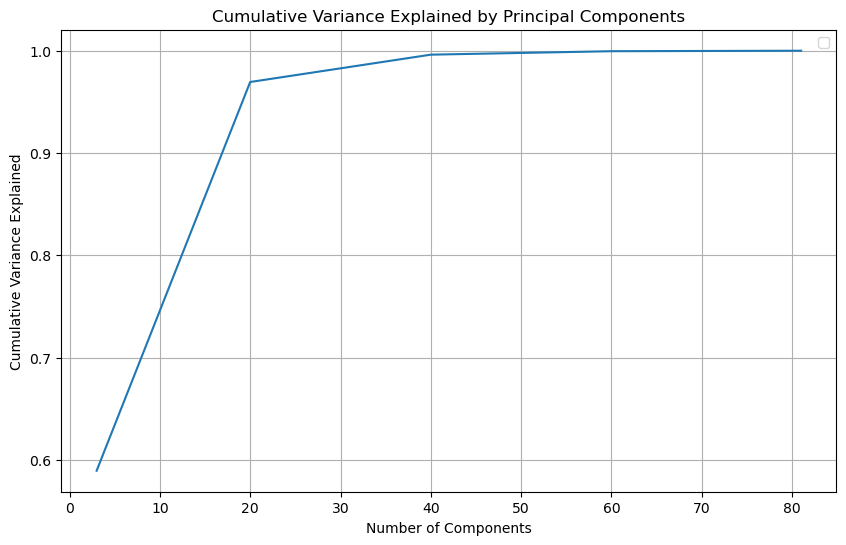

In [59]:
### START CODE ###
## Plot the explained variance vs number of components
plt.figure(figsize=(10, 6))
cumvar=[var[num-1] for num in nums]
plt.plot(nums,cumvar)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.legend()
plt.title("Cumulative Variance Explained by Principal Components")
plt.grid()
### END CODE ###
plt.show()

>In the graph obtained above, there is an elbow, or we can say a turning point, on the graph. From this, we see that even if we add more components, the cumulative variance doesn't rise noticeably. By choosing the number of components at this turning point or elbow, we can strike a balance between retained information and dimensionality reduction.

* **Part 4. (5 points)** For each of the reduced dataset, obtained in part 2.2, fit a linear regression model on the train data and show how adjusted $R^2$ varies as a function of # of components.(There will be a total of 5 ${R^2}$ score).


In [60]:
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
nums = [3,20,40,60,81]
res = []
for num in nums:

    ### START CODE ###
    ## Fit PCA components
    pca=PCA(n_components=num)
    ### END CODE ###


    ### START CODE ###
    ## Transform train and test data
    X_train_pca=pca.fit_transform(X_train)
    X_test_new=pca.transform(X_test)
    ### END CODE ###

    ### START CODE ###
    ## Compute explained variance
    var=pca.explained_variance_
    ### END CODE ###

    ### START CODE ###
    ## Fit LR and compute R-square and adjusted R-squared
    lrMod=LinearRegression()
    lrMod.fit(X_train_pca,Y_train)
    y_pred_lr=lrMod.predict(X_test_new)
    r_squared=r2_score(Y_test,y_pred_lr)
    ### END CODE ###

    adjusted_r_squared = 1 - (1-r_squared)*(len(Y_test)-1)/(len(Y_test)-X_test_new.shape[1]-1)
    print("Number of Components", num, ", Adjusted R^2",adjusted_r_squared)

Number of Components 3 , Adjusted R^2 0.4927514891461269
Number of Components 20 , Adjusted R^2 0.6240397311883805
Number of Components 40 , Adjusted R^2 0.6882677129357524
Number of Components 60 , Adjusted R^2 0.7155743366220386
Number of Components 81 , Adjusted R^2 0.7277522695494435


# Q5. (10 points) PCA vs T-SNE
* **Part 1.** **(3 points)** Now apply T-SNE to the dataset given above in Q4. You are required to carry out the following tasks:



1.   Initialize a t-SNE model with number of dimensions = 3, perplexity = 300, number of iterations = 300 and random state = 42
2.   Apply the t-SNE model to the training dataset











In [61]:
from sklearn.manifold import TSNE

### START CODE ###
## Initialize t-SNE model
tsne = TSNE(n_components=3,perplexity=300, n_iter=300,random_state=42)
### END CODE ###

### START CODE ###
## Fit and transform the data
X_train_tsne=tsne.fit_transform(X_train)
### END CODE ###

* **Part 2.** (3 points) For this part use a small subset of 500 samples of the training dataset and plot the first three t-SNE components similar to the PCA implementation above

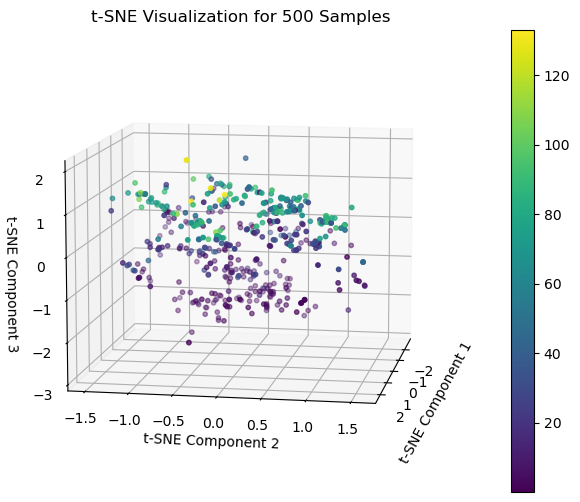

In [62]:
subset_size=500
x_subset,y_subset=X_train[:subset_size],Y_train[:subset_size]
x_subset_tsne=tsne.fit_transform(x_subset)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(x_subset_tsne[:, 0], x_subset_tsne[:, 1], x_subset_tsne[:, 2], c=y_subset, s=10)
plt.colorbar(scatter)
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
plt.title('t-SNE Visualization for 500 Samples')
ax.view_init(elev=10, azim=10)
plt.show()

* **Part 3. (4 points)** Now we will plot the PCA and t-SNE projections of the data and compare the plots side-by-side to see the difference in scatters created by the two methods. You can use first 1000 data points for this.

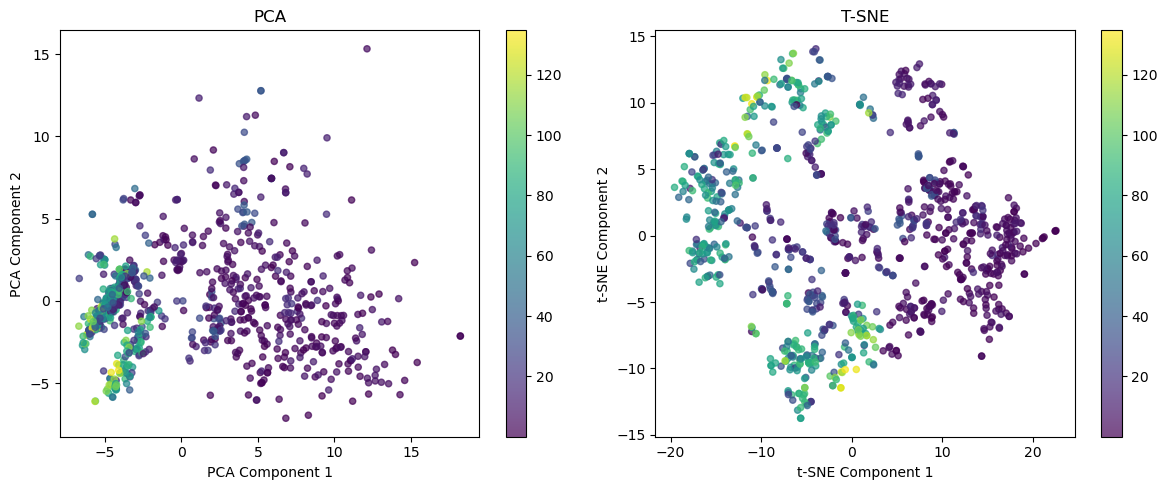

In [54]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

plt.figure(figsize=(12, 5))  # Adjust the figure size as needed

# First subplot (left)
### Obtain components from PCA
pca = PCA(n_components=3, random_state=42)
x_plt_pca = pca.fit_transform(X_train[:1000])

plt.subplot(1, 2, 1)  # 1 row, 2 columns, select the first subplot
plt.title('PCA')

### Scatter plot for PCA
scatter_pca = plt.scatter(x_plt_pca[:, 0], x_plt_pca[:, 1], c=Y_train[:1000], cmap='viridis', s=20, alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter_pca)

# Second subplot (right)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, select the second subplot

### Scatter plot for t-SNE
tsne = TSNE(n_components=3, random_state=42)
x_plt_tsne = tsne.fit_transform(X_train[:1000])

scatter_tsne = plt.scatter(x_plt_tsne[:, 0], x_plt_tsne[:, 1], c=Y_train[:1000], cmap='viridis', s=20, alpha=0.7)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter_tsne)

plt.title('T-SNE')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Show the plots
plt.tight_layout()
plt.show()